In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from pytorch_tabnet.tab_model import TabNetClassifier

In [81]:
df = pd.read_csv('../data/Churn_Modelling.csv')
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [82]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [83]:
# 데이터 전처리
sc = StandardScaler()
X = sc.fit_transform(X)

In [84]:
# 학습/검증 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# 모델 초기화
clf = TabNetClassifier()

# 모델 학습
clf.fit(
    X_train, y_train,                 # 학습 데이터와 라벨
    eval_set=[(X_test, y_test)],      # 검증 데이터셋 (성능 평가용)
    eval_name=['valid'],              # 검증 데이터셋의 이름 (로그 등에서 사용됨)
    eval_metric=['auc'],              # 검증에 사용할 평가 지표 (여기서는 AUC - 클래스 불균형에 강함)
    max_epochs=100,                   # 최대 학습 반복 횟수 (Epoch 수)
    patience=10,                      # 성능 향상 없을 때 조기 종료할 최대 Epoch 수
    batch_size=256,                   # 학습 배치 크기 (미니배치 단위 학습 크기)
    virtual_batch_size=128,           # 가상 배치 크기 (BatchNorm 안정화를 위한 내부 배치 크기)
    num_workers=0,                    # 데이터 로딩에 사용할 subprocess 수 (0이면 멀티프로세싱 안 씀)
    drop_last=False                   # 마지막 배치가 batch_size보다 작더라도 버리지 않고 사용
)

/Users/jungikim/miniconda3/envs/ai_basic_env/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.4948  | valid_auc: 0.71068 |  0:00:00s
epoch 1  | loss: 0.43258 | valid_auc: 0.76119 |  0:00:00s
epoch 2  | loss: 0.4139  | valid_auc: 0.79184 |  0:00:00s
epoch 3  | loss: 0.39249 | valid_auc: 0.81226 |  0:00:01s
epoch 4  | loss: 0.37935 | valid_auc: 0.81847 |  0:00:01s
epoch 5  | loss: 0.37403 | valid_auc: 0.81839 |  0:00:01s
epoch 6  | loss: 0.36487 | valid_auc: 0.82724 |  0:00:01s
epoch 7  | loss: 0.36532 | valid_auc: 0.82258 |  0:00:01s
epoch 8  | loss: 0.35666 | valid_auc: 0.83644 |  0:00:02s
epoch 9  | loss: 0.35487 | valid_auc: 0.83293 |  0:00:02s
epoch 10 | loss: 0.35217 | valid_auc: 0.83614 |  0:00:02s
epoch 11 | loss: 0.35042 | valid_auc: 0.84036 |  0:00:03s
epoch 12 | loss: 0.35062 | valid_auc: 0.83755 |  0:00:03s
epoch 13 | loss: 0.35149 | valid_auc: 0.83665 |  0:00:03s
epoch 14 | loss: 0.3488  | valid_auc: 0.84203 |  0:00:03s
epoch 15 | loss: 0.34542 | valid_auc: 0.84062 |  0:00:03s
epoch 16 | loss: 0.34997 | valid_auc: 0.83391 |  0:00:04s
epoch 17 | los

/Users/jungikim/miniconda3/envs/ai_basic_env/lib/python3.12/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# 모델 저장
# clf.save_model('../models/tabnet_model')

Successfully saved model at ../models/tabnet_model.zip


'../models/tabnet_model.zip'

In [86]:
trained_clf = TabNetClassifier()
trained_clf.load_model('../models/tabnet_model.zip')

/Users/jungikim/miniconda3/envs/ai_basic_env/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [87]:
# 예측 및 평가
y_preds = trained_clf.predict(X_test)
print("Validation Accuracy:", accuracy_score(y_test, y_preds))

Validation Accuracy: 0.8685


In [88]:
# 정확도
acc = accuracy_score(y_test, y_preds)
print("✅ Accuracy:", acc)

# 정밀도, 재현율, F1 등 전체 리포트
print("\n📋 Classification Report:")
print(classification_report(y_test, y_preds))

✅ Accuracy: 0.8685

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1618
           1       0.75      0.47      0.58       382

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.86      2000



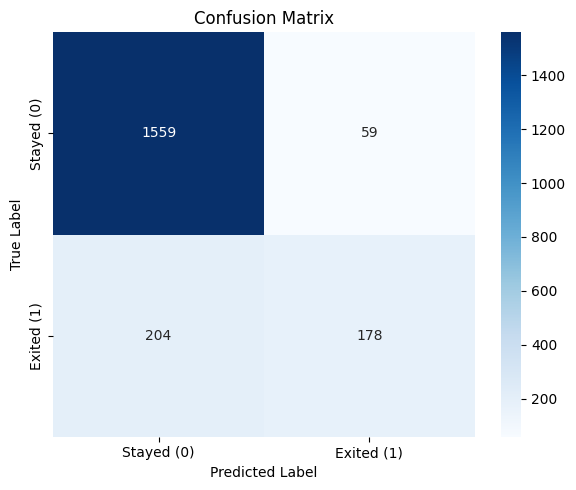

In [89]:
# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_preds)

# 라벨 지정 (0: 잔류, 1: 이탈)
labels = ['Stayed (0)', 'Exited (1)']

# 시각화
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()



🔥 AUC Score: 0.8554


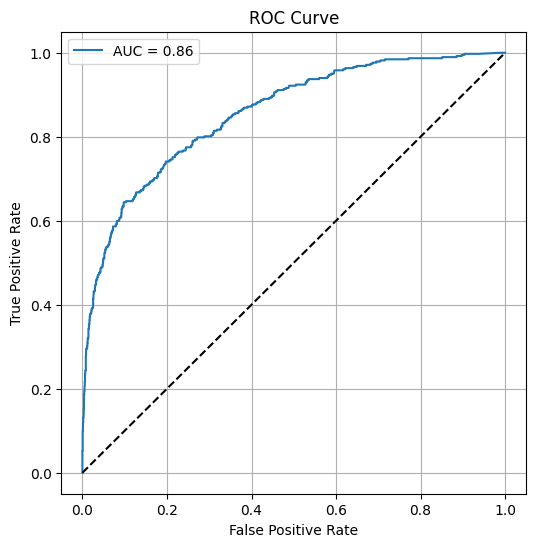

In [90]:
# 예측 확률값 사용
y_probs = trained_clf.predict_proba(X_test)[:, 1] 

# AUC 계산
auc = roc_auc_score(y_test, y_probs)
print(f"\n🔥 AUC Score: {auc:.4f}")

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# ROC 그래프
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # 무작위 예측선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
